# Cancer Survival Prediction

Given radiomics features with clinical data, predict patient survival at 3 years.

There are 852 columns.

1. Patient id
2. Gender
3. Age
4. Anonymous clinical data (clinical A to D)
5. Time to event
6. Patient Status
7. Radiomics features(v1-v842)
8. Target variable: Patient Status at 3 years

# Import Libraries and file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('CancerRadiomicsKaggle_v2_050620.csv')

# Data Exploration

In [4]:
data.head()

,Patient ID,Gender,Age,Clinical A,Clinical B,Clinical C,Clinical D,Time to Event,Patient Status,Patient Status at 3 Year,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,...,v803,v804,v805,v806,v807,v808,v809,v810,v811,v812,v813,v814,v815,v816,v817,v818,v819,v820,v821,v822,v823,v824,v825,v826,v827,v828,v829,v830,v831,v832,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
0,1,1,51,1,0,1,0,993,0,-1,2376.00,44.070965,2321.90625,47.047567,0.471206,5.829121,0.362637,0.775042,44.070965,0.123898,1799.574040,17.061189,44.000000,17.088007,23.648445,560.543814,3.972923,-106.121904,0.334698,0.995966,0.152574,5.279167,1.921166,0.376804,3.843143,0.971420,0.665239,0.337986,47.296891,2.929498,...,-91.169469,8.839778,128.219197,0.000716,71.546083,0.000749,0.068509,0.496877,187.353614,2.052828,2889.263673,2162.156294,0.894000,6737.718172,0.847999,0.001073,5.175846,3240.511014,0.777202,148.055805,290.942086,0.026557,0.417394,316.802371,20.156785,308.363636,1761.811230,0.239583,0.097143,9.989379e+05,2863.166008,0.671965,0.001812,7.082423,0.001697,0.002704,5599.760835,8.102155,0.081455,0.065024
1,2,1,52,2,1,2,0,2806,0,0,6842.25,35.032128,6802.21875,27.775745,0.667503,16.786691,0.829787,0.382367,30.364453,0.604365,2600.946480,23.047963,32.649655,29.347061,27.452409,759.734301,5.092622,246.792298,0.239096,0.997215,0.092184,6.056192,2.154275,0.332367,3.976414,0.973557,0.626258,0.647423,54.904818,3.663043,...,59.601434,10.294197,267.875197,0.000332,116.841945,0.000358,0.061652,0.690946,458.755487,2.384731,4633.865247,5405.186719,0.867291,12346.754650,0.802739,0.000634,5.628355,5309.837402,0.719543,329.335781,2302.858560,0.017044,0.442014,756.727804,29.178738,2331.255257,3908.978176,0.187658,0.464951,1.171983e+07,5707.741822,0.691453,0.000859,7.755168,0.000796,0.001142,12788.777320,10.510535,0.042781,0.070754
2,3,2,39,1,1,2,0,1114,0,0,2848.50,34.165041,2819.28125,30.180383,0.578099,9.798949,0.600774,0.592156,29.841247,0.324679,1669.453144,18.131597,32.649655,21.914607,24.523139,605.625647,4.999862,-132.612668,0.196246,0.995141,0.087231,8.602972,2.358950,0.360389,5.519779,0.964502,0.566132,0.487469,49.046277,3.586758,...,-29.468080,8.754108,193.885955,0.000655,119.840146,0.000686,0.065834,0.477533,209.973936,2.023957,3450.891532,2400.495948,0.883697,7823.888272,0.827946,0.000959,5.497215,3899.360310,0.749124,265.955210,647.870316,0.019758,0.501534,509.057143,20.054187,661.871921,2607.817548,0.267246,0.176926,2.498842e+06,3735.571429,0.735593,0.001540,7.250617,0.001460,0.002040,10151.403250,12.556235,0.085777,0.059948
3,4,1,47,1,1,2,0,1580,0,0,5865.00,39.843444,5808.87500,41.437198,0.488177,14.385234,0.525354,0.551074,38.160844,0.347157,3201.118401,21.769182,39.537956,24.698178,31.956314,1037.987452,4.399902,-2758.353542,0.370060,0.994560,0.174157,14.748448,2.155423,0.326782,12.066336,0.972825,0.667424,0.680754,63.912628,3.324637,...,-349.836549,14.323542,28.309243,0.000717,298.528870,0.000748,0.074021,0.723785,460.435317,2.467599,7142.130550,4367.559648,0.858010,21807.555660,0.782048,0.000976,5.684309,8432.939350,0.700629,634.119546,1260.606475,0.015694,0.560344,1118.445892,31.325651,1275.955912,5266.740560,0.255243,0.143694,1.161534e+07,7189.520541,0.775392,0.001576,7.601097,0.001290,0.001179,24152.978110,25.953500,0.082586,0.040302
4,5,1,43,2,1,2,0,1435,0,0,3104.25,39.651608,3065.87500,43.267747,0.516445,9.769965,0.394624,0.644578,38.762095,0.225802,1976.195692,17.074505,39.051248,18.027756,31.533454,1004.096184,4.874239,-1213.365238,0.187202,0.996089,0.094152,9.523002,2.303011,0.356399,6.849702,0.970781,0.595981,0.663384,63.066909,3.478654,...,-197.810632,13.393662,112.686716,0.000612,204.116138,0.000636,0.063036,0.590316,206.159361,2.303556,6651.433706,2260.097897,0.852286,18431.933430,0.781738,0.000821,5.772426,7849.138022,0.688383,461.578858,700.344825,0.016929,0.531189,561.998110,17.911153,715.649338,5174.824621,0.255617,0.090587,5.788522e+06,7122.637996,0.756142,0.001447,7.450933,0.0

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Patient ID,197.0,99.000000,57.013156,1.000000,50.000000,99.000000,148.000000,197.000000
Gender,197.0,1.208122,0.406999,1.000000,1.000000,1.000000,1.000000,2.000000
Age,197.0,49.532995,10.557190,18.000000,43.000000,50.000000,56.000000,75.000000
Clinical A,197.0,2.345178,1.001346,1.000000,2.000000,2.000000,3.000000,4.000000
Clinical B,197.0,1.928934,0.772635,0.000000,1.000000,2.000000,2.000000,3.000000
...,...,...,...,...,...,...,...,...
v838,197.0,0.000821,0.001002,0.000064,0.000294,0.000532,0.000960,0.009209
v839,197.0,21231.855628,25862.635795,136.164176,6006.401544,11174.884700,22244.272550,125045.290100
v840,197.0,9.683495,7.878545,1.472955,4.581915,7.573953,11.472103,46.554126
v841,197.0,0.045190,0.076926,0.000521,0.011046,0.026186,0.055755,0.745910


In [6]:
data_original = data.copy()

# Target column: Patient Status at 3 year
alive(0), dead(1), unknown value (-1)

In [7]:
data['Patient Status at 3 Year'].value_counts()

 0    164
 1     31
-1      2
Name: Patient Status at 3 Year, dtype: int64

In [8]:
data[data['Patient Status at 3 Year']==-1]

,Patient ID,Gender,Age,Clinical A,Clinical B,Clinical C,Clinical D,Time to Event,Patient Status,Patient Status at 3 Year,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,...,v803,v804,v805,v806,v807,v808,v809,v810,v811,v812,v813,v814,v815,v816,v817,v818,v819,v820,v821,v822,v823,v824,v825,v826,v827,v828,v829,v830,v831,v832,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
0,1,1,51,1,0,1,0,993,0,-1,2376.0,44.070965,2321.90625,47.047567,0.471206,5.829121,0.362637,0.775042,44.070965,0.123898,1799.574040,17.061189,44.00000,17.088007,23.648445,560.543814,3.972923,-106.121904,0.334698,0.995966,0.152574,5.279167,1.921166,0.376804,3.843143,0.971420,0.665239,0.337986,47.296891,2.929498,...,-91.169469,8.839778,128.219197,0.000716,71.546083,0.000749,0.068509,0.496877,187.353614,2.052828,2889.263673,2162.156294,0.89400,6737.718172,0.847999,0.001073,5.175846,3240.511014,0.777202,148.055805,290.942086,0.026557,0.417394,316.802371,20.156785,308.363636,1761.811230,0.239583,0.097143,9.989379e+05,2863.166008,0.671965,0.001812,7.082423,0.001697,0.002704,5599.760835,8.102155,0.081455,0.065024
39,40,1,68,2,1,2,1260,878,0,-1,9765.0,46.389654,9717.12500,35.863037,0.636385,18.977181,0.662121,0.356110,43.304157,0.529157,3460.369252,23.745686,44.31986,30.886890,18.081394,328.648623,2.569189,136.568388,0.593585,0.998560,0.376447,2.192027,1.255421,0.239565,1.892132,0.987592,0.828888,0.584681,36.162789,2.140433,...,139.801813,16.359911,236.828304,0.000634,52.876600,0.000777,0.111960,1.486383,989.764846,4.089545,1436.062004,4968.251857,0.76098,7082.765947,0.668002,0.002617,5.257892,1843.811764,0.548118,192.299328,14826.192470,0.022393,0.404266,561.121038,31.082133,14914.184440,1550.971491,0.106605,8.805621,2.529703e+07,2272.789625,0.661095,0.001646,7.519588,0.001409,0.000621,5263.966268,5.328614,0.016502,0.261644


There are two rows with unknown value(-1), so drop that rows.

In [9]:
data = data[data['Patient Status at 3 Year']!=-1]

# Data Preprocessing: Feature Engineering


**1. Gender**

category colum(1&2),

no missing value

In [10]:
data['Gender'].value_counts()

1    154
2     41
Name: Gender, dtype: int64

**convert to dummies**

In [11]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [12]:
data = create_dummies(data,'Gender')
data = data.drop('Gender',axis=1)

**2. Age**

no missing value

In [13]:
data['Age'].describe()

count    195.000000
mean      49.430769
std       10.527288
min       18.000000
25%       43.000000
50%       49.000000
75%       56.000000
max       75.000000
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


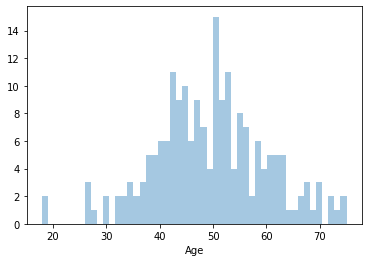

In [14]:
sns.distplot(data['Age'],kde=False,bins=50)

**3. Clinical_A**

Ordinal: 1-4 

no missing value

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


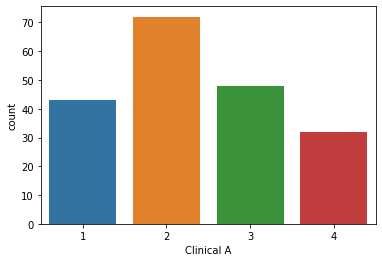

In [15]:
sns.countplot(data['Clinical A'])

**4. Clinical_B**

ordinal: 0-3

no missing value

In [16]:
data['Clinical B'].value_counts()

2    97
1    47
3    46
0     5
Name: Clinical B, dtype: int64

**5. Clinical_C**

ordinal: 1-4

no missing value

In [17]:
data['Clinical C'].value_counts()

3    97
4    71
2    27
Name: Clinical C, dtype: int64

**6. Clinical_D**

continuous

no missing value

In [18]:
data['Clinical D'].describe()

count       195.000000
mean      14002.476923
std       41259.419518
min           0.000000
25%           0.000000
50%        2240.000000
75%       10400.000000
max      281000.000000
Name: Clinical D, dtype: float64

**7. Time to event**

Given from dataset description, 'Time to Event' is not one of the model's inputs. It only implies patient status at 3 years

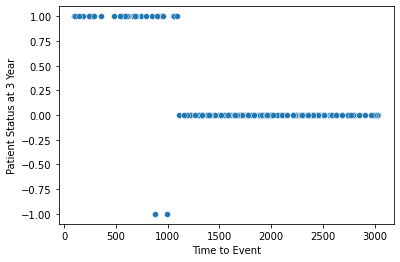

In [19]:
sns.scatterplot(x='Time to Event', y='Patient Status at 3 Year', data=data_original)

From the above graph: When 'Time to Event' < 1,000 , 'Patient Status at 3 Year' is equal to 1(dead).

When 'Time to Event' > 1,000 , 'Patient Status at 3 Year' is equal to 0(alive).

In [20]:
data_original[data_original['Patient Status at 3 Year']==-1]

,Patient ID,Gender,Age,Clinical A,Clinical B,Clinical C,Clinical D,Time to Event,Patient Status,Patient Status at 3 Year,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,...,v803,v804,v805,v806,v807,v808,v809,v810,v811,v812,v813,v814,v815,v816,v817,v818,v819,v820,v821,v822,v823,v824,v825,v826,v827,v828,v829,v830,v831,v832,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
0,1,1,51,1,0,1,0,993,0,-1,2376.0,44.070965,2321.90625,47.047567,0.471206,5.829121,0.362637,0.775042,44.070965,0.123898,1799.574040,17.061189,44.00000,17.088007,23.648445,560.543814,3.972923,-106.121904,0.334698,0.995966,0.152574,5.279167,1.921166,0.376804,3.843143,0.971420,0.665239,0.337986,47.296891,2.929498,...,-91.169469,8.839778,128.219197,0.000716,71.546083,0.000749,0.068509,0.496877,187.353614,2.052828,2889.263673,2162.156294,0.89400,6737.718172,0.847999,0.001073,5.175846,3240.511014,0.777202,148.055805,290.942086,0.026557,0.417394,316.802371,20.156785,308.363636,1761.811230,0.239583,0.097143,9.989379e+05,2863.166008,0.671965,0.001812,7.082423,0.001697,0.002704,5599.760835,8.102155,0.081455,0.065024
39,40,1,68,2,1,2,1260,878,0,-1,9765.0,46.389654,9717.12500,35.863037,0.636385,18.977181,0.662121,0.356110,43.304157,0.529157,3460.369252,23.745686,44.31986,30.886890,18.081394,328.648623,2.569189,136.568388,0.593585,0.998560,0.376447,2.192027,1.255421,0.239565,1.892132,0.987592,0.828888,0.584681,36.162789,2.140433,...,139.801813,16.359911,236.828304,0.000634,52.876600,0.000777,0.111960,1.486383,989.764846,4.089545,1436.062004,4968.251857,0.76098,7082.765947,0.668002,0.002617,5.257892,1843.811764,0.548118,192.299328,14826.192470,0.022393,0.404266,561.121038,31.082133,14914.184440,1550.971491,0.106605,8.805621,2.529703e+07,2272.789625,0.661095,0.001646,7.519588,0.001409,0.000621,5263.966268,5.328614,0.016502,0.261644


Consider whether to fill unknown value(-1) in the 'Patient Status at 3 Year' column with the above conclusion.

But in this case, the unknown values may be caused by various reasons such as loss follow up or any dropout.

Then drop the 'time to event' column.

In [21]:
data = data.drop('Time to Event',axis=1)

**8. Patient status**

patient's lastest status 0=alive, 1=dead

In [22]:
data['Patient Status'].value_counts()

0    148
1     47
Name: Patient Status, dtype: int64

**10. Feature selection**

In [23]:
data_patient = data[['Age', 'Clinical A', 'Clinical B', 'Clinical C',
       'Clinical D','Patient Status', 'Patient Status at 3 Year','Gender_1','Gender_2']]

In [24]:
data_patient.corr()

,Age,Clinical A,Clinical B,Clinical C,Clinical D,Patient Status,Patient Status at 3 Year,Gender_1,Gender_2
Age,1.000000,0.094495,-0.063859,0.016748,0.071616,0.247507,0.266660,0.156601,-0.156601
Clinical A,0.094495,1.000000,-0.061590,0.492176,0.110167,0.280497,0.253148,0.031593,-0.031593
Clinical B,-0.063859,-0.061590,1.000000,0.628049,0.234572,0.215609,0.124679,-0.054919,0.054919
Clinical C,0.016748,0.492176,0.628049,1.000000,0.175821,0.328183,0.271401,0.004706,-0.004706
Clinical D,0.071616,0.110167,0.234572,0.175821,1.000000,0.226877,0.155365,-0.024167,0.024167
Patient Status,0.247507,0.280497,0.215609,0.328183,0.226877,1.000000,0.771509,0.055378,-0.055378
Patient Status at 3 Year,0.266660,0.253148,0.124679,0.271401,0.155365,0.771509,1.000000,0.086662,-0.086662
Gender_1,0.156601,0.031593,-0.054919,0.004706,-0.024167,0.055378,0.086662,1.000000,-1.000000
Gender_2,-0.156601,-0.031593,0.054919,-0.004706,0.024167,-0.055378,-0.086662,-1.000000,1.000000


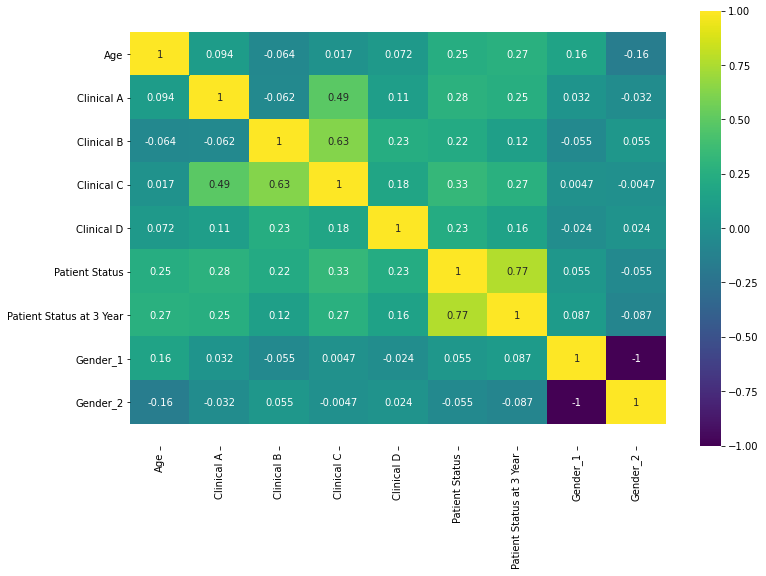

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(data_patient.corr(),annot=True,cmap='viridis')
b, t = plt.ylim()
b += 0.5 
t -= 0.5
plt.ylim(b, t)
plt.show()

**10.1) 'Patient Status' and 'Patient Status at 3 year'**

    -There is collinearity between two features
    
    -'Patient Status' indicates the latest status of the patient. 
    If it was collected before 3 years, we need to use the status at 3 years.
    And if it was collected after 3 years, it cannot use in the model, which only predicts status at 3 years. But it can use in other post hoc analysis instead.
    
    - So, drop the 'Patient Status' column.

In [26]:
data_patient = data_patient.drop('Patient Status',axis=1)
data = data.drop('Patient Status',axis=1)

**10.2) Drop Gender column**

The correlation between 'gender' and 'Patient Status at 3 Year' is very low compare to other features.

So, drop 'Gender_1' and 'Gender_2' columns.

In [27]:
data_patient = data_patient.drop(['Gender_1', 'Gender_2'],axis=1)
data = data.drop(['Gender_1', 'Gender_2'],axis=1)

**10.3) drop 'Patient ID' column**

In [28]:
data = data.drop('Patient ID', axis=1)

In [29]:
data

,Age,Clinical A,Clinical B,Clinical C,Clinical D,Patient Status at 3 Year,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,...,v803,v804,v805,v806,v807,v808,v809,v810,v811,v812,v813,v814,v815,v816,v817,v818,v819,v820,v821,v822,v823,v824,v825,v826,v827,v828,v829,v830,v831,v832,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
1,52,2,1,2,0,0,6842.25,35.032128,6802.21875,27.775745,0.667503,16.786691,0.829787,0.382367,30.364453,0.604365,2600.946480,23.047963,32.649655,29.347061,27.452409,759.734301,5.092622,246.792298,0.239096,0.997215,0.092184,6.056192,2.154275,0.332367,3.976414,0.973557,0.626258,0.647423,54.904818,3.663043,9.127226,13126.587010,0.794044,-0.246191,...,59.601434,10.294197,267.875197,0.000332,116.841945,0.000358,0.061652,0.690946,458.755487,2.384731,4633.865247,5405.186719,0.867291,12346.754650,0.802739,0.000634,5.628355,5309.837402,0.719543,329.335781,2302.858560,0.017044,0.442014,756.727804,29.178738,2331.255257,3908.978176,0.187658,0.464951,1.171983e+07,5707.741822,0.691453,0.000859,7.755168,0.000796,0.001142,12788.77732,10.510535,0.042781,0.070754
2,39,1,1,2,0,0,2848.50,34.165041,2819.28125,30.180383,0.578099,9.798949,0.600774,0.592156,29.841247,0.324679,1669.453144,18.131597,32.649655,21.914607,24.523139,605.625647,4.999862,-132.612668,0.196246,0.995141,0.087231,8.602972,2.358950,0.360389,5.519779,0.964502,0.566132,0.487469,49.046277,3.586758,8.539954,9969.580376,0.751839,-0.213485,...,-29.468080,8.754108,193.885955,0.000655,119.840146,0.000686,0.065834,0.477533,209.973936,2.023957,3450.891532,2400.495948,0.883697,7823.888272,0.827946,0.000959,5.497215,3899.360310,0.749124,265.955210,647.870316,0.019758,0.501534,509.057143,20.054187,661.871921,2607.817548,0.267246,0.176926,2.498842e+06,3735.571429,0.735593,0.001540,7.250617,0.001460,0.002040,10151.40325,12.556235,0.085777,0.059948
3,47,1,1,2,0,0,5865.00,39.843444,5808.87500,41.437198,0.488177,14.385234,0.525354,0.551074,38.160844,0.347157,3201.118401,21.769182,39.537956,24.698178,31.956314,1037.987452,4.399902,-2758.353542,0.370060,0.994560,0.174157,14.748448,2.155423,0.326782,12.066336,0.972825,0.667424,0.680754,63.912628,3.324637,24.151920,125211.120800,0.780261,-0.231255,...,-349.836549,14.323542,28.309243,0.000717,298.528870,0.000748,0.074021,0.723785,460.435317,2.467599,7142.130550,4367.559648,0.858010,21807.555660,0.782048,0.000976,5.684309,8432.939350,0.700629,634.119546,1260.606475,0.015694,0.560344,1118.445892,31.325651,1275.955912,5266.740560,0.255243,0.143694,1.161534e+07,7189.520541,0.775392,0.001576,7.601097,0.001290,0.001179,24152.97811,25.953500,0.082586,0.040302
4,43,2,1,2,0,0,3104.25,39.651608,3065.87500,43.267747,0.516445,9.769965,0.394624,0.644578,38.762095,0.225802,1976.195692,17.074505,39.051248,18.027756,31.533454,1004.096184,4.874239,-1213.365238,0.187202,0.996089,0.094152,9.523002,2.303011,0.356399,6.849702,0.970781,0.595981,0.663384,63.066909,3.478654,14.491821,44730.738280,0.790444,-0.227715,...,-197.810632,13.393662,112.686716,0.000612,204.116138,0.000636,0.063036,0.590316,206.159361,2.303556,6651.433706,2260.097897,0.852286,18431.933430,0.781738,0.000821,5.772426,7849.138022,0.688383,461.578858,700.344825,0.016929,0.531189,561.998110,17.911153,715.649338,5174.824621,0.255617,0.090587,5.788522e+06,7122.637996,0.756142,0.001447,7.450933,0.001233,0.001903,20879.17131,33.389569,0.068150,0.029494
5,62,1,1,2,0,0,6067.50,45.069391,6010.34375,38.650843,0.552583,19.572903,0.507500,0.481342,43.732139,0.506403,2893.029211,19.615285,44.102154,27.294688,32.539744,1062.976078,4.307157,11.263909,0.317743,0.997409,0.149914,7.844712,2.071805,0.312191,5.856863,0.978066,0.672814,0.335621,65.079488,3.234887,8.011073,13670.231750,0.721569,-0.228873,...,59.810900,16.415198,210.334523,0.000291,111.477810,0.000310,0.065408,0.973115,411.742083,2.869402,7188.066509,4336.594518,0.845913,23683.036140,0.762271,0.000541,5.641553,8452.369650,0.683347,306.204273,2417.479195,0.019270,0.45

# Train/Test Split

In [30]:
y = data['Patient Status at 3 Year']
X = data.drop('Patient Status at 3 Year',axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=99,stratify=y)

In [33]:
X_train.shape

(165, 847)

In [34]:
X_test.shape

(30, 847)

# Analysis and Model building #

There is the curse of dimensionality problem. I manage this with two steps approach.

    1.Dimensionality reduction: PCA

    2.Association analysis: neural networks

reference : Rizzo S, Botta F, Raimondi S, et al. Radiomics: the facts and the challenges of image analysis. Eur Radiol Exp. 2018;2(1):36. Published 2018 Nov 14. doi:10.1186/s41747-018-0068-z

# Dimensional Reduction: PCA

Perform PCA with radiomics features.

In [35]:
X.columns

Index(['Age', 'Clinical A', 'Clinical B', 'Clinical C', 'Clinical D', 'v1',
       'v2', 'v3', 'v4', 'v5',
       ...
       'v833', 'v834', 'v835', 'v836', 'v837', 'v838', 'v839', 'v840', 'v841',
       'v842'],
      dtype='object', length=847)

In [36]:
components_train = X_train.drop(['Age', 'Clinical A', 'Clinical B', 'Clinical C',
       'Clinical D'],axis=1)

components_test = X_test.drop(['Age', 'Clinical A', 'Clinical B', 'Clinical C',
       'Clinical D'],axis=1)

Perform standard scaler before PCA.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
std_scaler = StandardScaler()
std_scaler.fit(components_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
components_train = std_scaler.transform(components_train)
components_test = std_scaler.transform(components_test)

PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=0.95,random_state=99)

In [42]:
pca.fit(components_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=99,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
xtrain_pca = pca.transform(components_train)
xtest_pca = pca.transform(components_test)

In [44]:
components_train.shape

(165, 842)

In [45]:
xtrain_pca.shape

(165, 37)

Scale other columns

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train_feat = X_train[['Age','Clinical A','Clinical B','Clinical C','Clinical D']]
X_test_feat = X_test[['Age','Clinical A','Clinical B','Clinical C','Clinical D']]

In [49]:
scaler.fit(X_train_feat)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [50]:
X_train_feat = scaler.transform(X_train_feat)
X_test_feat = scaler.transform(X_test_feat)

Combine scaled features with PCA transformed features

In [51]:
allx_train = pd.concat([pd.DataFrame(X_train_feat), pd.DataFrame(xtrain_pca)], axis=1)
allx_test = pd.concat([pd.DataFrame(X_test_feat), pd.DataFrame(xtest_pca)], axis=1)

In [52]:
allx_train.columns=['Age','Clinical A','Clinical B','Clinical C','Clinical D',
                    'rf0','rf1','rf2','rf3','rf4','rf5','rf6','fr7','rf8','rf9',
                   'rf10','rf11','rf12','rf13','rf14','rf15','rf16','fr17','rf18','rf19',
                   'rf20','rf21','rf22','rf23','rf24','rf25','rf26','fr27','rf28','rf29',
                   'rf30','rf31','rf32','rf33','rf34','rf35','rf36']

In [53]:
allx_train.describe()

,Age,Clinical A,Clinical B,Clinical C,Clinical D,rf0,rf1,rf2,rf3,rf4,rf5,rf6,fr7,rf8,rf9,rf10,rf11,rf12,rf13,rf14,rf15,rf16,fr17,rf18,rf19,rf20,rf21,rf22,rf23,rf24,rf25,rf26,fr27,rf28,rf29,rf30,rf31,rf32,rf33,rf34,rf35,rf36
count,165.000000,165.000000,165.000000,165.000000,165.000000,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,0.551621,0.442424,0.654545,0.603030,0.055231,5.167584e-16,3.337398e-16,1.453383e-16,1.291896e-16,2.583792e-16,4.037175e-16,-9.689219e-17,2.590520e-16,2.691450e-18,-2.691450e-18,6.459479e-17,2.072416e-16,-2.691450e-17,5.652044e-17,1.480297e-16,-1.291896e-16,4.037175e-17,2.301190e-16,-1.184238e-16,-1.614870e-17,-8.074349e-18,-4.037175e-17,-1.029480e-16,5.517472e-17,3.768030e-17,4.710037e-17,-2.018587e-17,1.614870e-17,1.251524e-16,-5.046468e-18,2.489591e-17,-2.052230e-17,-4.306320e-17,4.037175e-18,-1.076580e-17,-1.076580e-16,-3.835316e-17
std,0.177262,0.325442,0.249365,0.333573,0.158558,1.811024e+01,1.136338e+01,7.344958e+00,6.930642e+00,6.031532e+00,5.024842e+00,4.601688e+00,4.322750e+00,3.631085e+00,3.527866e+00,3.306269e+00,3.143504e+00,2.950760e+00,2.912926e+00,2.634892e+00,2.582854e+00,2.472023e+00,2.329429e+00,2.244616e+00,2.122148e+00,2.056492e+00,1.991803e+00,1.930061e+00,1.868616e+00,1.835001e+00,1.814828e+00,1.723076e+00,1.664304e+00,1.615002e+00,1.576893e+00,1.557221e+00,1.497612e+00,1.461674e+00,1.428345e+00,1.360083e+00,1.354453e+00,1.324123e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.252854e+01,-3.698512e+01,-1.665238e+01,-1.660032e+01,-1.042801e+01,-1.735128e+01,-1.272127e+01,-1.041913e+01,-1.477126e+01,-1.188515e+01,-1.112062e+01,-1.090754e+01,-8.211007e+00,-8.934978e+00,-9.783663e+00,-1.042980e+01,-7.070411e+00,-6.549166e+00,-5.514577e+00,-5.149711e+00,-6.610792e+00,-5.635509e+00,-6.342699e+00,-5.283552e+00,-4.455221e+00,-4.741063e+00,-3.632622e+00,-4.035998e+00,-4.557807e+00,-3.904536e+00,-6.886201e+00,-4.148321e+00,-4.040873e+00,-3.906893e+00,-3.778398e+00,-3.359776e+00,-4.218729e+00
25%,0.438596,0.333333,0.666667,0.500000,0.000000,-1.179258e+01,-6.259536e+00,-3.714134e+00,-4.250140e+00,-3.939455e+00,-2.483641e+00,-2.116420e+00,-3.208398e+00,-1.658487e+00,-2.563520e+00,-1.566019e+00,-2.007215e+00,-1.767016e+00,-1.469860e+00,-1.450231e+00,-1.383288e+00,-1.468382e+00,-1.595785e+00,-1.190509e+00,-1.412771e+00,-1.090118e+00,-1.119819e+00,-1.037450e+00,-1.094149e+00,-1.289379e+00,-1.033430e+00,-1.029401e+00,-8.858687e-01,-9.507238e-01,-1.022682e+00,-9.446012e-01,-7.818091e-01,-9.122951e-01,-8.619064e-01,-8.586245e-01,-9.250203e-01,-8.239031e-01
50%,0.543860,0.333333,0.666667,0.500000,0.008363,-4.834005e+00,-6.402043e-01,-2.818732e-01,8.838812e-01,-1.361600e+00,-1.608151e-01,1.764152e-01,-3.151476e-01,-2.131707e-01,3.129776e-01,-1.992432e-01,3.140278e-01,3.828970e-02,-3.157338e-01,-1.880353e-01,9.761208e-02,1.758069e-02,-4.726856e-02,-3.004025e-01,3.467042e-02,3.474235e-02,1.167561e-01,-1.526198e-01,3.773602e-02,-3.599029e-02,-2.608030e-01,-9.515747e-02,-1.051395e-02,-2.226053e-02,-3.759190e-02,-3.636448e-02,-1.073548e-02,5.898566e-03,-4.027219e-02,1.261521e-01,1.723923e-03,2.020518e-02
75%,0.649123,0.666667,0.666667,1.000000,0.037722,5.572064e+00,6.091980e+00,3.330136e+00,4.370573e+00,2.496375e+00,1.688281e+00,1.953981e+00,2.850946e+00,1.742758e+00,2.608457e+00,1.430606e+00,1.835574e+00,1.619203e+00,1.309987e+00,1.192439e+00,1.159924e+00,1.152627e+00,1.286038e+00,1.277627e+00,1.306630e+00,1.255149e+00,1.223213e+00,1.256785e+00,9.563020e-01,1.270841e+00,9.862755e-01,9.914100e-01,1.086335e+00,9.470697e-01,9.891613e-01,8.821712e-01,9.131506e-01,8.6636

In [54]:
allx_test.columns=['Age','Clinical A','Clinical B','Clinical C','Clinical D',
                    'rf0','rf1','rf2','rf3','rf4','rf5','rf6','fr7','rf8','rf9',
                   'rf10','rf11','rf12','rf13','rf14','rf15','rf16','fr17','rf18','rf19',
                   'rf20','rf21','rf22','rf23','rf24','rf25','rf26','fr27','rf28','rf29',
                   'rf30','rf31','rf32','rf33','rf34','rf35','rf36']

In [55]:
allx_train = allx_train.values
allx_test = allx_test.values
y_train = y_train.values
y_test = y_test.values

# Association analysis: Neural Network

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [58]:
tf.__version__

'2.3.0'

In [59]:
allx_train.shape

(165, 42)

In [60]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
check_point = ModelCheckpoint('cancer_survival_prediction.hdf5', monitor='val_accuracy',save_best_only=True)

In [61]:
model = Sequential()

model.add(Dense(units=42,activation='relu'))

model.add(Dense(units=35,activation='relu'))

model.add(Dense(units=20,activation='relu'))

model.add(Dense(units=10,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.fit(x=allx_train,y=y_train,epochs=100,validation_data=(allx_test,y_test),verbose=1,callbacks=[check_point])

Epoch 1/100
6/6 [==============================] - 0s 34ms/step - loss: 3.0171 - accuracy: 0.1818 - val_loss: 1.3212 - val_accuracy: 0.3000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.3793 - accuracy: 0.3333 - val_loss: 0.6901 - val_accuracy: 0.5333
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7036 - accuracy: 0.6182 - val_loss: 0.4926 - val_accuracy: 0.8333
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5253 - accuracy: 0.7455 - val_loss: 0.4256 - val_accuracy: 0.9000
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.8182 - val_loss: 0.4087 - val_accuracy: 0.8667
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.8424 - val_loss: 0.4063 - val_accuracy: 0.8333
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.8424 - val_loss: 0.4044 - val_accuracy: 0.8333
Epoch 8/100
6/6 [=========

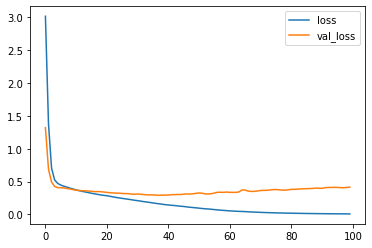

In [63]:
model_loss = pd.DataFrame(model.history.history)
model_loss['loss'].plot()
model_loss['val_loss'].plot()
plt.legend()


In [64]:
predictions = model.predict_classes(allx_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


# Model Evaluation

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [66]:
accuracy = accuracy_score(y_test,predictions)

In [67]:
print(accuracy)

0.9


In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.75      0.60      0.67         5

    accuracy                           0.90        30
   macro avg       0.84      0.78      0.80        30
weighted avg       0.89      0.90      0.90        30



In [69]:
print(confusion_matrix(y_test,predictions))

[[24  1]
 [ 2  3]]


The model's accuracy is quite good, but there is an unbalanced class problem in this dataset.

In the use case application, clinicians want to know the patients' survival chances to choose a proper treatment plan; in this case, the recall of 0 is good(0.96).